In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [3]:
#loaded Data
file_path = '../data/raw/raw_analyst_ratings.csv'

df = pd.read_csv(file_path)
# Preview the data
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [4]:
#get info about the data
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [5]:
# check for null
print(df.isnull().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [6]:
# get headlines and their counts
# Count the occurrences of each headline
headline_counts = df['headline'].value_counts()

print(headline_counts)

headline
Benzinga's Top Upgrades                                                                                                                 5449
Benzinga's Top Downgrades                                                                                                               5372
Benzinga's Top Initiations                                                                                                              4241
Stocks That Hit 52-Week Lows On Thursday                                                                                                3962
Morning Market Losers                                                                                                                   3440
                                                                                                                                        ... 
FireEye Option Alert: Oct 18 $14 Calls at the Ask: 500 @ $0.641 vs 30793 OI; Earnings 10/29 After Close [est] Ref=$13.8                    1
Fire

In [7]:

print(df['stock'].value_counts())

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
PLW        1
RFT        1
WIP        1
ONEQ       1
BHL        1
Name: count, Length: 6204, dtype: int64


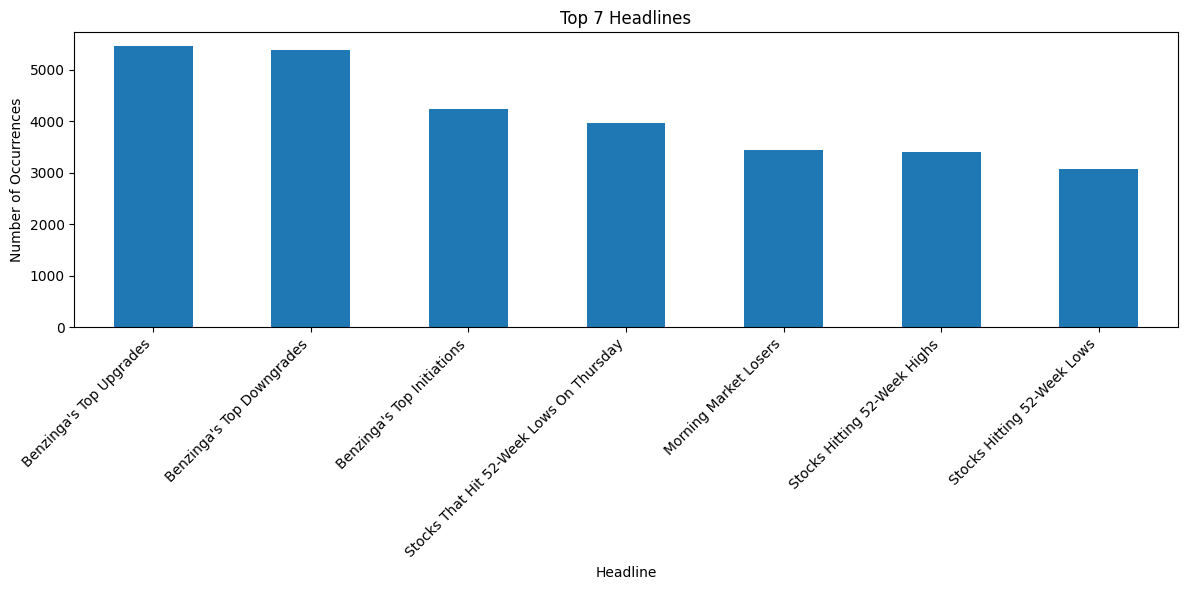

In [8]:
# Get the top 7 headlines
top_7_headlines = headline_counts.head(7)

# Create a bar chart for the top 7 headlines
plt.figure(figsize=(12, 6))
top_7_headlines.plot(kind='bar')
plt.title('Top 7 Headlines')
plt.xlabel('Headline')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

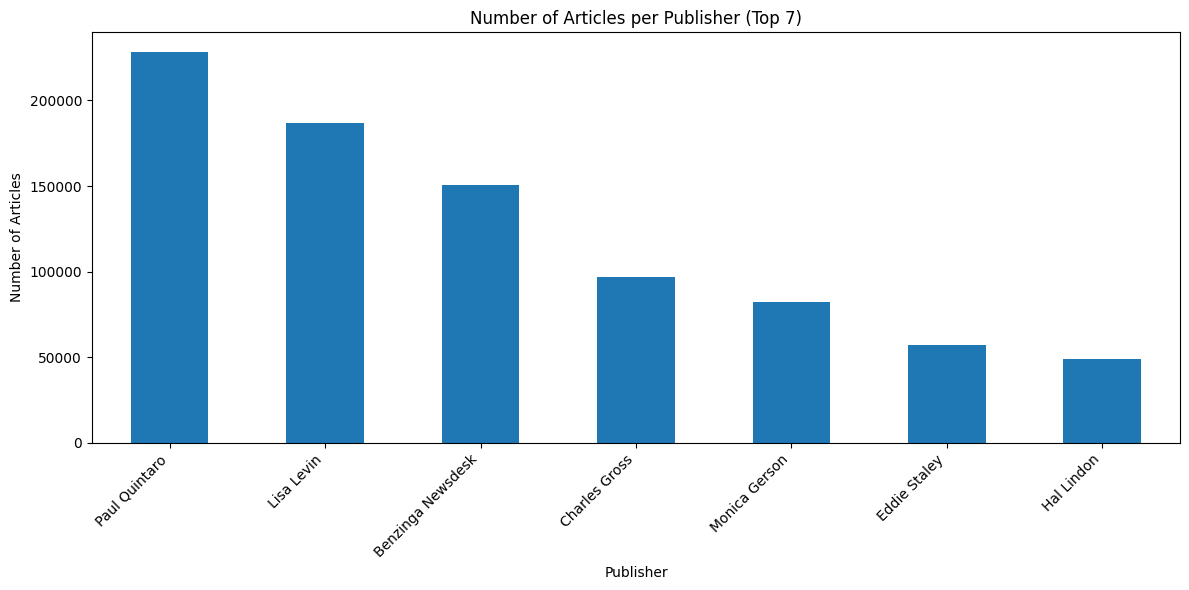

In [9]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Get the top 7 publishers
top_7_publishers = publisher_counts.head(7)

# Create a bar chart for the top 7
plt.figure(figsize=(12, 6))
top_7_publishers.plot(kind='bar')
plt.title('Number of Articles per Publisher (Top 7)')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


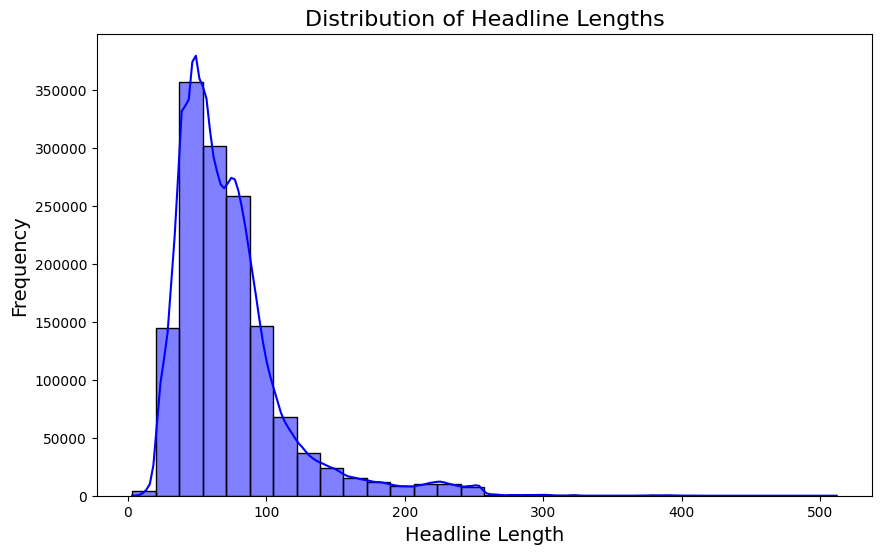

In [10]:
# Add a column for headline length
df['headline_length'] = df['headline'].apply(len)

# Compute statistics for headline lengths
length_stats = df['headline_length'].describe()
print(length_stats)

# Plot distribution of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Headline Lengths', fontsize=16)
plt.xlabel('Headline Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [11]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\helin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

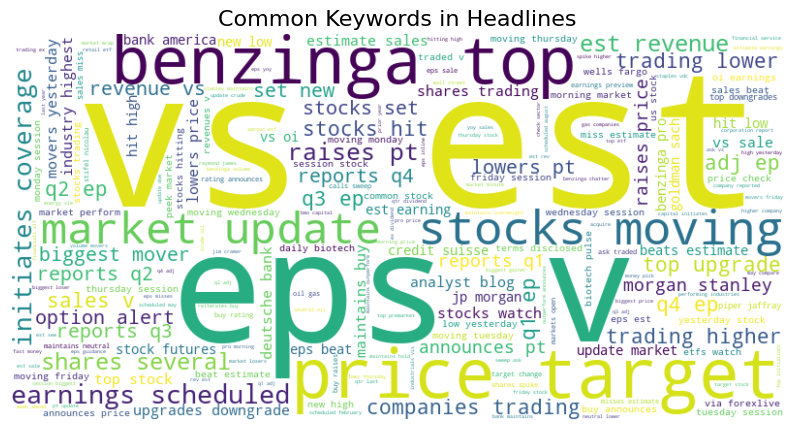

In [12]:
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your existing code:
stop_words = set(stopwords.words('english'))

df['tokens'] = df['headline'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words])

all_tokens = [token for tokens in df['tokens'] for token in tokens]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Keywords in Headlines', fontsize=16)
plt.show()


In [13]:
# Parse dates from the 'date' column
df['parse_date'] = pd.to_datetime(df['date'], errors='coerce')

# Confirm the column is created
print(df['parse_date'].head())


0   2020-06-05 10:30:54-04:00
1   2020-06-03 10:45:20-04:00
2   2020-05-26 04:30:07-04:00
3   2020-05-22 12:45:06-04:00
4   2020-05-22 11:38:59-04:00
Name: parse_date, dtype: datetime64[ns, UTC-04:00]


Headline Length Descriptive Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


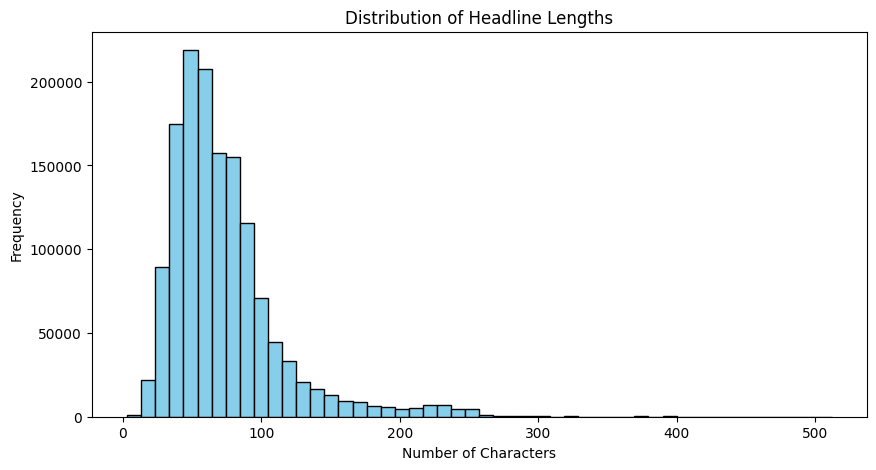


Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


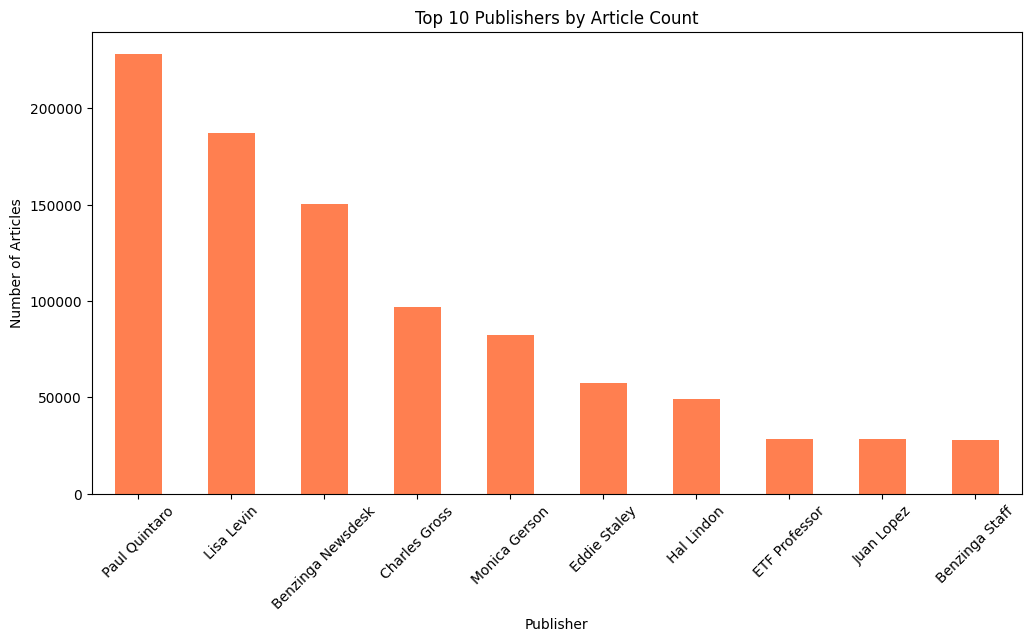


Number of Articles Published per Day:
parse_date
2011-04-27    1
2011-04-28    2
2011-04-29    2
2011-04-30    1
2011-05-01    1
2011-05-02    9
2011-05-03    3
2011-05-05    3
2011-05-06    3
2011-05-07    2
2011-05-09    3
2011-05-11    3
2011-05-12    1
2011-05-13    4
2011-05-15    1
2011-05-16    4
2011-05-17    3
2011-05-18    3
2011-05-19    2
2011-05-20    1
dtype: int64


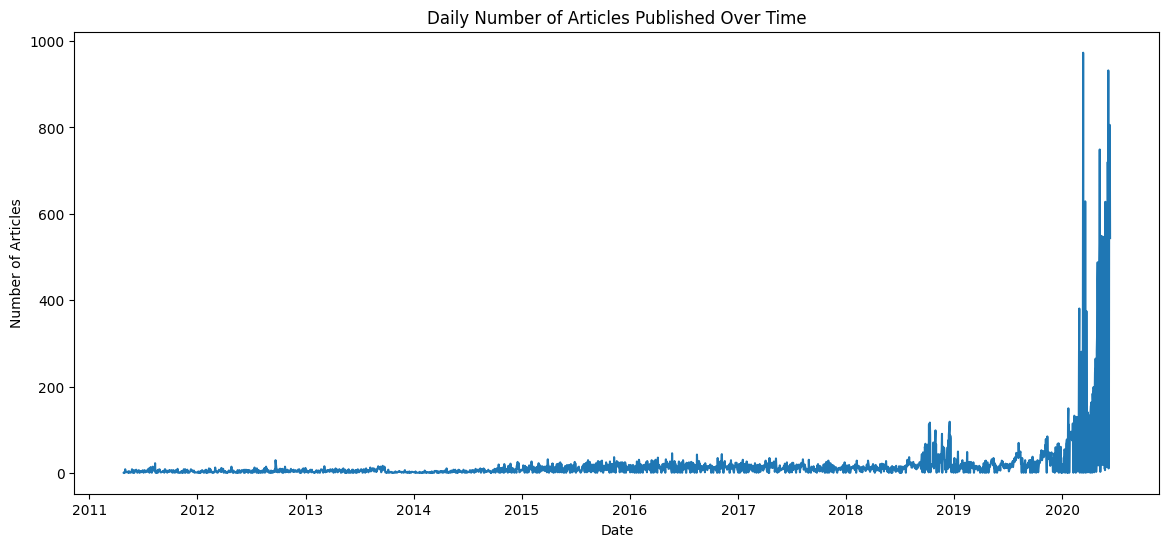

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Descriptive statistics for headline lengths
df['headline_length'] = df['headline'].str.len()
print("Headline Length Descriptive Statistics:")
print(df['headline_length'].describe())

# Optional: visualize headline length distribution
plt.figure(figsize=(10, 5))
plt.hist(df['headline_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# 2. Count number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts.head(20))  # Top 20 publishers

# Optional: bar plot for top 10 publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# 3. Analyze publication dates for trends
# Make sure 'parse_date' column is datetime type
df['parse_date'] = pd.to_datetime(df['parse_date'], errors='coerce')

# Count articles by day
daily_counts = df.groupby(df['parse_date'].dt.date).size()

print("\nNumber of Articles Published per Day:")
print(daily_counts.head(20))  # First 20 days

# Optional: plot articles over time (daily)
plt.figure(figsize=(14, 6))
daily_counts.plot()
plt.title('Daily Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


In [17]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import pandas as pd

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalnum() and word not in stop_words]

# Use a smaller dataset for testing (adjust size if needed)
sample_size = 1000  # Limit to first 1000 rows for testing; increase as needed
df_sample = df.head(sample_size)

# Preprocess headlines
df_sample['clean_tokens'] = df_sample['headline'].apply(preprocess_text)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df_sample['clean_tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_sample['clean_tokens']]

# Build LDA model with fewer passes and topics for faster testing
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,  # Adjust topics as needed
    passes=3,      # Reduce passes for faster computation
    random_state=42
)

# Print topics
print("\nIdentified Topics:")
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topic {idx + 1}: {topic}")

# Assign dominant topic to each headline
def get_dominant_topic(bow):
    topic_probs = lda_model.get_document_topics(bow)
    return max(topic_probs, key=lambda x: x[1])[0] if topic_probs else None

df_sample = df_sample.copy()
df_sample['dominant_topic'] = [get_dominant_topic(doc) for doc in corpus]

# Display top headlines per topic
print("\nTop headlines per topic:")
for topic_num in range(3):  # Adjust range based on num_topics
    print(f"\nTopic {topic_num + 1}:")
    print(df_sample[df_sample['dominant_topic'] == topic_num]['headline'].head(5))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\helin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\helin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\helin\AppData\Local\Temp\ipykernel_17196\1396720558.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['clean_tokens'] = df_sample['headline'].apply(preprocess_text)



Identified Topics:
Topic 1: 0.083*"agilent" + 0.058*"technologies" + 0.020*"pt" + 0.016*"raises" + 0.014*"maintains"
Topic 2: 0.046*"vs" + 0.040*"est" + 0.039*"agilent" + 0.029*"eps" + 0.019*"sales"
Topic 3: 0.036*"stocks" + 0.016*"watch" + 0.009*"stock" + 0.009*"moving" + 0.008*"futures"

Top headlines per topic:

Topic 1:
4    B of A Securities Maintains Neutral on Agilent...
5    CFRA Maintains Hold on Agilent Technologies, L...
6    UBS Maintains Neutral on Agilent Technologies,...
7    Agilent Technologies shares are trading higher...
8    Wells Fargo Maintains Overweight on Agilent Te...
Name: headline, dtype: object

Topic 2:
9            10 Biggest Price Target Changes For Friday
15                  Earnings Scheduled For May 21, 2020
20    Shares of several healthcare companies are tra...
24    Agilent Reports Has Become Top-Level Sponsor O...
25               Agilent Withdraws Q2 And FY20 Guidance
Name: headline, dtype: object

Topic 3:
0             Stocks That Hit 52-Week 

In [18]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalnum() and word not in stop_words]

# Preprocess headlines
df['clean_tokens'] = df['headline'].apply(preprocess_text)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['clean_tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['clean_tokens']]

# Build LDA model
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,  # Number of topics to extract
    passes=10,
    random_state=42
)

# Print topics
print("\nIdentified Topics:")
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topic {idx + 1}: {topic}")

# Assign dominant topic to each headline
def get_dominant_topic(bow):
    topic_probs = lda_model.get_document_topics(bow)
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0] if topic_probs else None
    return dominant_topic

# Assign dominant topics
df['dominant_topic'] = [get_dominant_topic(doc) for doc in corpus]

# Display top headlines for each topic
print("\nTop headlines per topic:")
for topic_num in range(5):  # Adjust range based on num_topics
    print(f"\nTopic {topic_num + 1}:")
    print(df[df['dominant_topic'] == topic_num]['headline'].head(5))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\helin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\helin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [19]:
# Count number of articles per publisher
publisher_counts = df['publisher'].value_counts()

print("Top 20 publishers by article count:")
print(publisher_counts.head(20))


Top 20 publishers by article count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


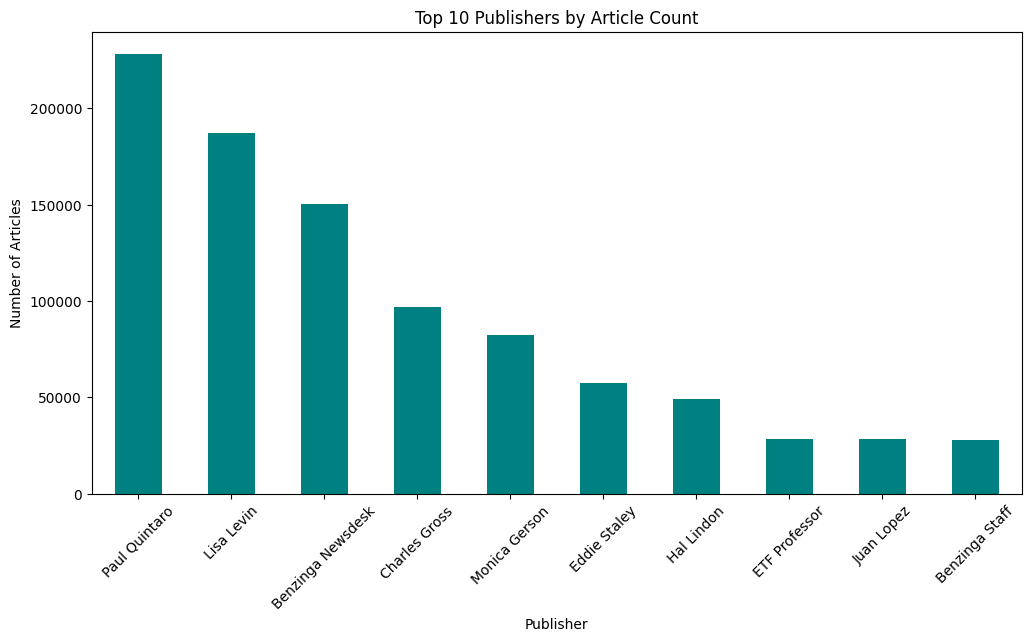

In [20]:
import matplotlib.pyplot as plt

# Plot top 10 publishers by article count
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Compare average headline length per publisher (proxy for content differences)
publisher_headline_length = df.groupby('publisher')['headline'].apply(lambda x: x.str.len().mean())

print("Average headline length per publisher (top 10):")
print(publisher_headline_length.sort_values(ascending=False).head(10))


Average headline length per publisher (top 10):
publisher
Benzinga Newsdesk                             228.241899
Benzinga  Newsdesk                            158.268945
Brad Hammond                                  157.949234
MicroCapital                                  141.520000
Luke J Jacobi                                 135.762994
luke@benzinga.com                             122.936129
fnmedia                                       121.000000
newsdesk+benzingastaffwriter3@benzinga.com    120.000000
Benzinga Newsdesk                             114.650508
Trevor Turner                                 114.000000
Name: headline, dtype: float64


In [22]:
import re

# Extract domain from email-like publisher names
def extract_domain(publisher):
    if '@' in publisher:
        return publisher.split('@')[-1].lower()
    return None

df['publisher_domain'] = df['publisher'].apply(extract_domain)

# Count frequencies of unique domains
domain_counts = df['publisher_domain'].value_counts().dropna()

print("Top 20 publisher email domains by article count:")
print(domain_counts.head(20))


Top 20 publisher email domains by article count:
publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


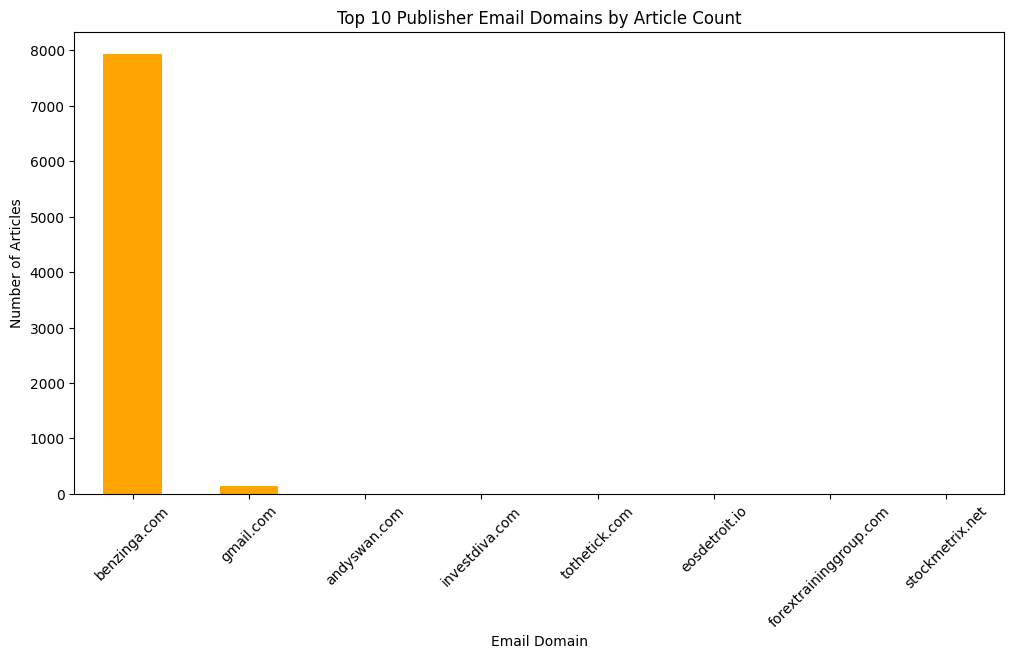

In [23]:
# Plot top 10 email domains by article count
plt.figure(figsize=(12, 6))
domain_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Publisher Email Domains by Article Count')
plt.xlabel('Email Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()
